<a href="https://colab.research.google.com/github/angelinakhatiwada/Urban-Sound-Classification/blob/main/FNN%2C_RNN%2C_CNN_Classification_Mels_(512%2C_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Sound Classification

## Classification

### Mels features 128 x 4



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os

import pickle

In [51]:
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, Flatten, Dense, MaxPool2D, Dropout, LSTM
from tensorflow.keras.utils import to_categorical 

### Data import from pickle

In [4]:
with open('features_mels_512.p', 'rb') as f:
    data = pickle.load(f)

In [5]:
data.head()

,features,shape,label,fold,file_name
0,"[6.7016525e-05, 0.0002738931, 0.00043046506, 0...","(512,)",3,5,100032-3-0-0.wav
1,"[0.046293005, 0.046115912, 0.031325452, 0.0162...","(512,)",2,5,100263-2-0-117.wav
2,"[0.028046967, 0.03285183, 0.030295085, 0.01307...","(512,)",2,5,100263-2-0-121.wav
3,"[0.025350068, 0.04161336, 0.037191, 0.04856568...","(512,)",2,5,100263-2-0-126.wav
4,"[0.05126126, 0.035394225, 0.01814437, 0.013484...","(512,)",2,5,100263-2-0-137.wav


In [6]:
data_final = list(data['features'])
data_final = pd.DataFrame(data_final)
data_cols = data_final.columns
data_final['label'] = data['label']
data_final['fold'] = data['fold']

print(data_final.shape)


(8732, 514)


In [7]:
dummies = pd.get_dummies(data_final['label']).rename(columns=lambda x: 'label_' + str(x))
data_final = pd.concat([data_final, dummies], axis=1)
data_final.drop(['label'], inplace=True, axis=1)
data_final.shape

(8732, 523)

In [8]:
def df_transform(fold):
  X_fold_df = data_final[data_final['fold'].isin(fold)]
  X = X_fold_df.iloc[:, 0:512].to_numpy()
  y = X_fold_df.iloc[:, 513:523].to_numpy()

  return X, y

In [36]:
X_train, y_train = df_transform(['1','2','3','4','6'])
X_train.shape, y_train.shape

((4499, 512), (4499, 10))

In [37]:
X_val, y_val = df_transform(['5'])
X_val.shape, y_val.shape

((936, 512), (936, 10))

In [38]:
X_test7, y_test7 = df_transform(['7'])
X_test8, y_test8 = df_transform(['8'])
X_test9, y_test9 = df_transform(['9'])
X_test10, y_test10 = df_transform(['10'])

## Classification

In [13]:
def plot_accuracy(history):
  #accuracy
  plt.figure(figsize=(8,3))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  #loss
  plt.figure(figsize=(8,3))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [19]:
def test_scores(model):
  score5 = model.evaluate(X_val, y_val)
  score7 = model.evaluate(X_test7, y_test7)
  score8 = model.evaluate(X_test8, y_test8)
  score9 = model.evaluate(X_test9, y_test9)
  score10 = model.evaluate(X_test10, y_test10)
  test_scores = [score5[1],score7[1],score8[1],score9[1],score10[1]]
  
  return test_scores

### CNN model

In [14]:
# data reshaping for CNN
X_train = X_train.reshape(X_train.shape[0],128,4,1)
X_val = X_val.reshape(X_val.shape[0],128,4,1)
X_test7 = X_test7.reshape(X_test7.shape[0],128,4,1)
X_test8 = X_test8.reshape(X_test8.shape[0],128,4,1)
X_test9 = X_test9.reshape(X_test9.shape[0],128,4,1)
X_test10 = X_test10.reshape(X_test10.shape[0],128,4,1)

In [15]:
model = Sequential()
input_dim = (128,4,1)

model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 4, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 2, 64)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 2, 128)        73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 1, 128)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 1, 128)        0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data =(X_val, y_val), verbose =True)

Epoch 1/30
36/36 [==============================] - 10s 258ms/step - loss: 3.4732 - accuracy: 0.2427 - val_loss: 2.0570 - val_accuracy: 0.2874
Epoch 2/30
36/36 [==============================] - 9s 250ms/step - loss: 2.0023 - accuracy: 0.3505 - val_loss: 2.0397 - val_accuracy: 0.2618
Epoch 3/30
36/36 [==============================] - 9s 251ms/step - loss: 1.7533 - accuracy: 0.4125 - val_loss: 1.8949 - val_accuracy: 0.3259
Epoch 4/30
36/36 [==============================] - 9s 251ms/step - loss: 1.5694 - accuracy: 0.4721 - val_loss: 1.8209 - val_accuracy: 0.3697
Epoch 5/30
36/36 [==============================] - 9s 252ms/step - loss: 1.4743 - accuracy: 0.5134 - val_loss: 1.7689 - val_accuracy: 0.4316
Epoch 6/30
36/36 [==============================] - 9s 254ms/step - loss: 1.4249 - accuracy: 0.5366 - val_loss: 1.7212 - val_accuracy: 0.4444
Epoch 7/30
36/36 [==============================] - 9s 253ms/step - loss: 1.3037 - accuracy: 0.5672 - val_loss: 1.6611 - val_accuracy: 0.4455
Epoch

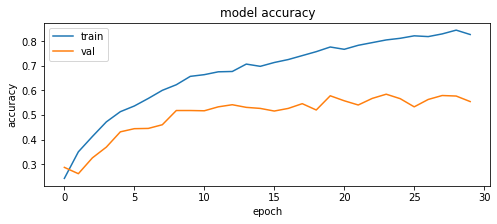

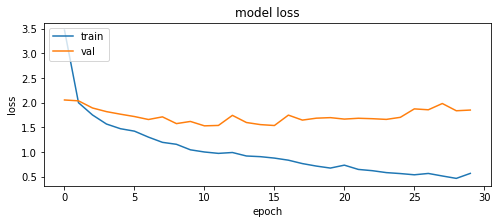

In [18]:
plot_accuracy(history)

In [22]:
test_scores_cnn = test_scores(model)
test_scores_cnn

27/27 [==============================] - 0s 18ms/step - loss: 1.7120 - accuracy: 0.5484


[0.5544871687889099,
 0.5811455845832825,
 0.5384615659713745,
 0.5526960492134094,
 0.5483871102333069]

In [23]:
print((np.mean(test_scores_cnn), np.std(test_scores_cnn)))

(0.5550354957580567, 0.014187364728666909)


### FNN

In [31]:
# data reshaping for NN
X_train = X_train.reshape(X_train.shape[0], 512)
X_val = X_val.reshape(X_val.shape[0],512)
X_test7 = X_test7.reshape(X_test7.shape[0],512)
X_test8 = X_test8.reshape(X_test8.shape[0],512)
X_test9 = X_test9.reshape(X_test9.shape[0],512)
X_test10 = X_test10.reshape(X_test10.shape[0],512)

In [32]:
X_train.shape, X_val.shape

((4499, 512), (936, 512))

In [45]:
#forming model
model=Sequential()

#building the model
model.add(Dense(units=512,activation='relu',input_dim=512))
model.add(Dropout(0.1))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)               

In [46]:
#compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
history = model.fit(X_train,y_train,epochs=50 ,batch_size=64, validation_data = (X_val, y_val))

Epoch 1/50
71/71 [==============================] - 1s 12ms/step - loss: 7.7674 - accuracy: 0.1947 - val_loss: 2.8546 - val_accuracy: 0.2115
Epoch 2/50
71/71 [==============================] - 1s 9ms/step - loss: 2.9992 - accuracy: 0.2643 - val_loss: 2.2771 - val_accuracy: 0.2885
Epoch 3/50
71/71 [==============================] - 1s 9ms/step - loss: 2.4628 - accuracy: 0.3016 - val_loss: 2.0501 - val_accuracy: 0.2970
Epoch 4/50
71/71 [==============================] - 1s 9ms/step - loss: 2.2165 - accuracy: 0.3250 - val_loss: 2.1793 - val_accuracy: 0.3344
Epoch 5/50
71/71 [==============================] - 1s 9ms/step - loss: 2.0664 - accuracy: 0.3705 - val_loss: 2.0837 - val_accuracy: 0.3568
Epoch 6/50
71/71 [==============================] - 1s 10ms/step - loss: 1.9384 - accuracy: 0.4265 - val_loss: 2.0462 - val_accuracy: 0.3226
Epoch 7/50
71/71 [==============================] - 1s 9ms/step - loss: 1.8317 - accuracy: 0.4388 - val_loss: 2.0281 - val_accuracy: 0.3504
Epoch 8/50
71/71 [

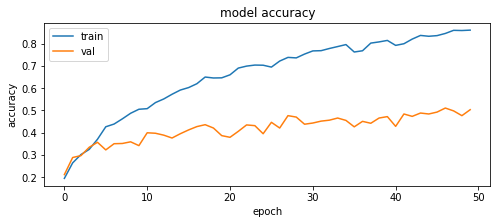

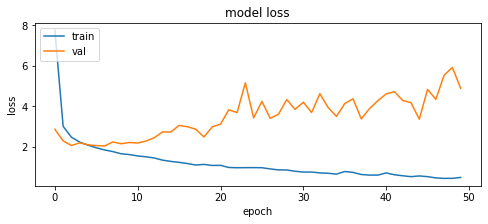

In [48]:
plot_accuracy(history)

In [49]:
test_scores_fnn = test_scores(model)
test_scores_fnn

27/27 [==============================] - 0s 3ms/step - loss: 2.6266 - accuracy: 0.5018


[0.5032051205635071,
 0.49403342604637146,
 0.5570719838142395,
 0.5183823704719543,
 0.5017921328544617]

In [50]:
print((np.mean(test_scores_fnn), np.std(test_scores_fnn)))

(0.5148970067501069, 0.02251489894641382)


### RNN

In [52]:
# data reshaping for RNN
X_train = X_train.reshape(X_train.shape[0],128,4)
X_val = X_val.reshape(X_val.shape[0],128,4)
X_test7 = X_test7.reshape(X_test7.shape[0],128,4)
X_test8 = X_test8.reshape(X_test8.shape[0],128,4)
X_test9 = X_test9.reshape(X_test9.shape[0],128,4)
X_test10 = X_test10.reshape(X_test10.shape[0],128,4)

In [59]:
# Neural network model
input_shape = (128,4)

model = Sequential()
model.add(LSTM(128,input_shape=input_shape, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               68096     
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dropout_27 (Dropout)        (None, 32)               

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
history = model.fit(X_train,y_train,epochs=50 ,batch_size=128, validation_data = (X_val, y_val))

Epoch 1/50
36/36 [==============================] - 19s 461ms/step - loss: 2.2570 - accuracy: 0.1387 - val_loss: 2.2982 - val_accuracy: 0.0812
Epoch 2/50
36/36 [==============================] - 16s 450ms/step - loss: 2.1864 - accuracy: 0.1736 - val_loss: 2.1830 - val_accuracy: 0.2137
Epoch 3/50
36/36 [==============================] - 16s 449ms/step - loss: 2.0626 - accuracy: 0.2334 - val_loss: 2.0857 - val_accuracy: 0.1944
Epoch 4/50
36/36 [==============================] - 16s 448ms/step - loss: 1.9994 - accuracy: 0.2576 - val_loss: 1.9833 - val_accuracy: 0.2094
Epoch 5/50
36/36 [==============================] - 16s 450ms/step - loss: 1.9218 - accuracy: 0.3001 - val_loss: 2.0379 - val_accuracy: 0.1891
Epoch 6/50
36/36 [==============================] - 16s 450ms/step - loss: 1.8898 - accuracy: 0.2992 - val_loss: 1.9492 - val_accuracy: 0.2457
Epoch 7/50
36/36 [==============================] - 16s 451ms/step - loss: 1.8065 - accuracy: 0.3303 - val_loss: 1.9752 - val_accuracy: 0.2660

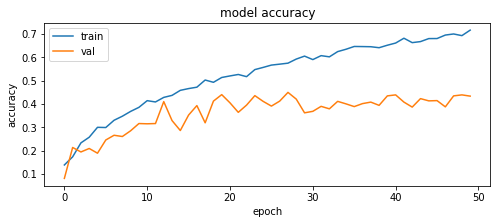

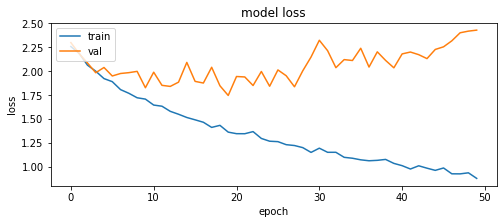

In [62]:
plot_accuracy(history)

In [63]:
test_scores_rnn = test_scores(model)
test_scores_rnn

27/27 [==============================] - 1s 32ms/step - loss: 1.8347 - accuracy: 0.4600


[0.4337606728076935,
 0.47374701499938965,
 0.4776674807071686,
 0.4387255012989044,
 0.45997610688209534]

In [64]:
print((np.mean(test_scores_rnn), np.std(test_scores_rnn)))

(0.4567753553390503, 0.01783387668093271)
